In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from glob import glob

In [4]:
alts_sizes = [200, 2000, 20000]

### Distribution of probs gets spikier with more alts

CPU times: user 1min 8s, sys: 3.49 s, total: 1min 11s
Wall time: 1min 11s


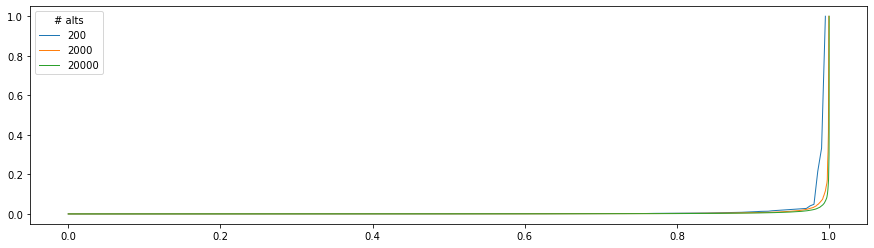

In [6]:
%%time
fig, ax = plt.subplots(figsize=(15, 4))
for i, size in enumerate(alts_sizes):
    with open('../data/true_probs_{0}_alts.npy'.format(size), 'rb') as f:
        true_probs = np.load(f)
    probs_true_sorted = np.sort(true_probs)
    mean_probs = probs_true_sorted.mean(axis=0)
    max_mean = np.max(mean_probs)
    mean_probs_normed = mean_probs / max_mean
    alts_vals = np.arange(size)
    alts_vals_normed = alts_vals / size
    ax.plot(alts_vals_normed, mean_probs_normed, lw=1, label=size)
    del true_probs
    
ax.legend(title='# alts')

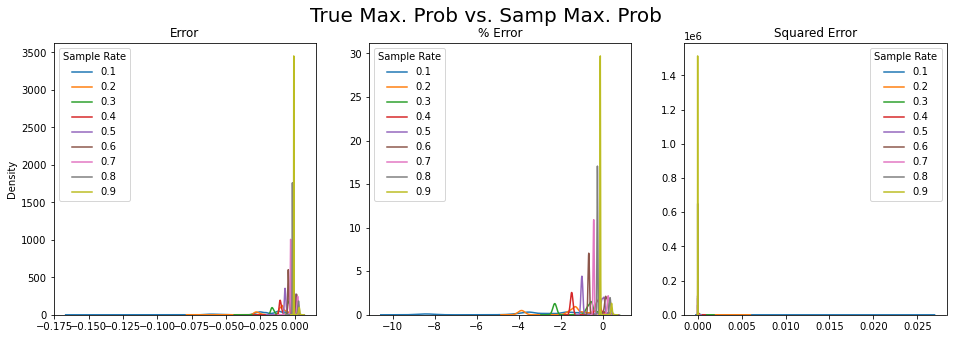

In [62]:
fig, axarr = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle("True Max. Prob vs. Samp Max. Prob", fontsize=20)
for i in range(1,10):

    fname = '../data/chooser_metrics_200000_alts_sr_{0}.npy'.format(i)
    with open(fname, 'rb') as f:
        metrics = np.load(f)
        metrics = metrics.reshape((15, 750000)).T
    
        sns.kdeplot(metrics[:, 0], label=np.round(i * .1, 1), ax=axarr[0])
        axarr[0].legend(title='Sample Rate')
        axarr[0].set_title("Error")
        
        sns.kdeplot(metrics[:, 1], label=np.round(i * .1, 1), ax=axarr[1])
        axarr[1].legend(title='Sample Rate')
        axarr[1].set_title("% Error")
        axarr[1].set_ylabel("")
        
        sns.kdeplot(metrics[:, 2], label=np.round(i * .1, 1), ax=axarr[2])
        axarr[2].legend(title='Sample Rate')
        axarr[2].set_title("Squared Error")
        axarr[2].set_ylabel("")

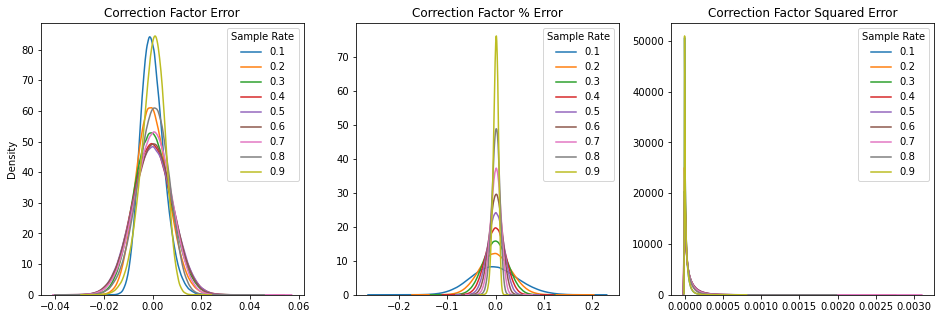

In [61]:
fig, axarr = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle("True Samp. Max. Prob vs. Samp Max. Prob", fontsize=20)
for i in range(1,10):

    fname = '../data/chooser_metrics_200000_alts_sr_{0}.npy'.format(i)
    with open(fname, 'rb') as f:
        metrics = np.load(f)
        metrics = metrics.reshape((15, 750000)).T
    
        sns.kdeplot(metrics[:, 6], label=np.round(i * .1, 1), ax=axarr[0])
        axarr[0].legend(title='Sample Rate')
        axarr[0].set_title("Correction Factor Error")
        
        sns.kdeplot(metrics[:, 7], label=np.round(i * .1, 1), ax=axarr[1])
        axarr[1].legend(title='Sample Rate')
        axarr[1].set_title("Correction Factor % Error")
        axarr[1].set_ylabel("")
        
        sns.kdeplot(metrics[:, 8], label=np.round(i * .1, 1), ax=axarr[2])
        axarr[2].legend(title='Sample Rate')
        axarr[2].set_title("Correction Factor Squared Error")
        axarr[2].set_ylabel("")

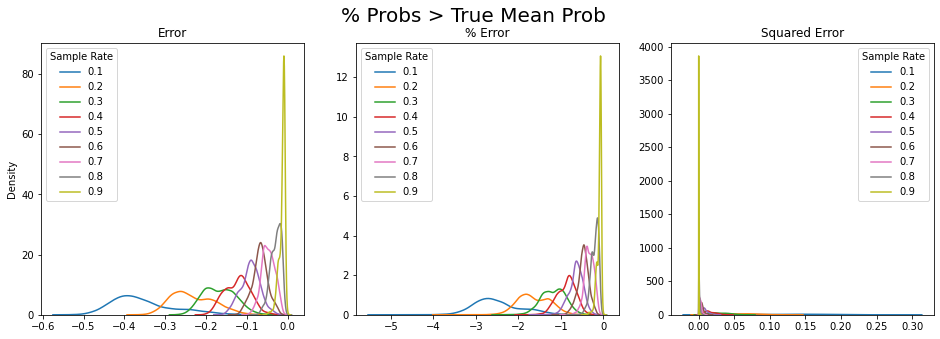

In [66]:
fig, axarr = plt.subplots(1, 3, figsize=(16,5))
fig.suptitle("% Probs > True Mean Prob", fontsize=20)
for i in range(1,10):

    fname = '../data/chooser_metrics_2000_alts_sr_{0}.npy'.format(i)
    with open(fname, 'rb') as f:
        metrics = np.load(f)
        metrics = metrics.reshape((15, 7500)).T
    
        sns.kdeplot(metrics[:, 9], label=np.round(i * .1, 1), ax=axarr[0])
        axarr[0].legend(title='Sample Rate')
        axarr[0].set_title("Error")
        
        sns.kdeplot(metrics[:, 10], label=np.round(i * .1, 1), ax=axarr[1])
        axarr[1].legend(title='Sample Rate')
        axarr[1].set_title("% Error")
        axarr[1].set_ylabel("")
        
        sns.kdeplot(metrics[:, 11], label=np.round(i * .1, 1), ax=axarr[2])
        axarr[2].legend(title='Sample Rate')
        axarr[2].set_title("Squared Error")
        axarr[2].set_ylabel("")

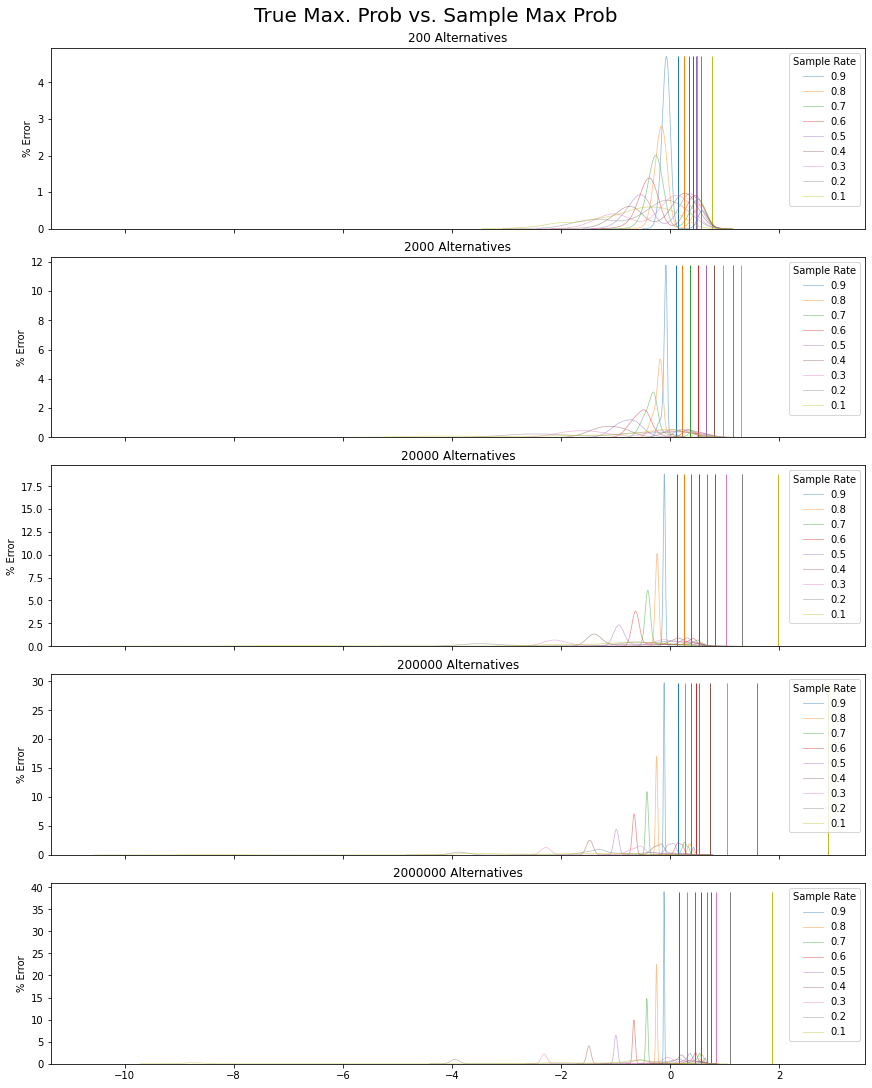

In [105]:
fig, axarr = plt.subplots(5, 1, figsize=(12,15), sharex=True, constrained_layout=True)
fig.suptitle("True Max. Prob vs. Sample Max Prob", fontsize=20)
for j, a in enumerate([200,2000,20000,200000,2000000]):
    for i in range(1,10)[::-1]:
        fname = '../data/chooser_metrics_{1}_alts_sr_{0}.npy'.format(i, a)
        with open(fname, 'rb') as f:
            metrics = np.load(f)
        metrics = metrics.reshape((15, int(a * 750/200))).T
        metric = metrics[:, 1]
        sns.kdeplot(metric, label=np.round(i * .1, 1), ax=axarr[j], alpha=0.5, lw=0.75)
        color = axarr[j].lines[-1].get_color()
        max_val = axarr[j].lines[0].get_ydata().max()
        axarr[j].vlines(np.mean(np.abs(metric)), 0, max_val, lw=1, edgecolor=color, alpha=1)
        axarr[j].legend(title='Sample Rate')
        axarr[j].set_title("{0} Alternatives".format(a))
        axarr[j].set_ylabel("% Error")

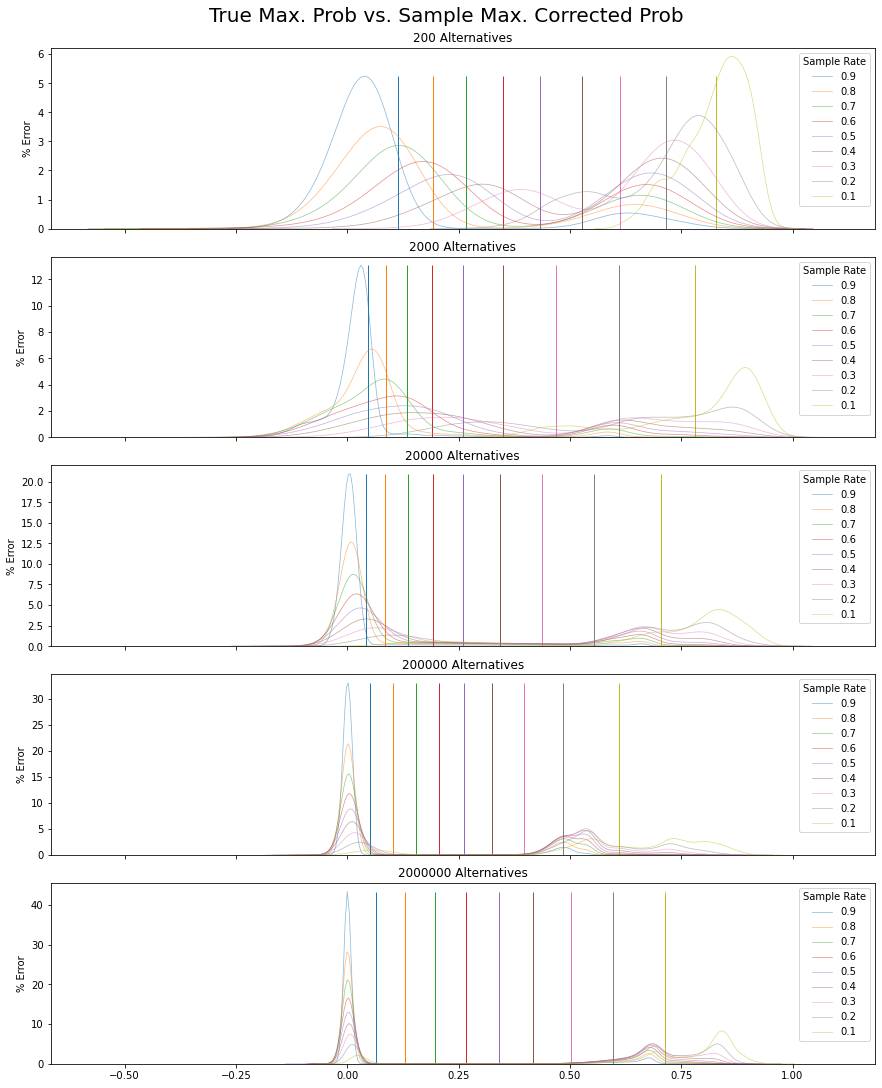

In [103]:
fig, axarr = plt.subplots(5, 1, figsize=(12,15), sharex=True, constrained_layout=True)
fig.suptitle("True Max. Prob vs. Sample Max. Corrected Prob", fontsize=20)
for j, a in enumerate([200,2000,20000,200000,2000000]):
    for i in range(1,10)[::-1]:
        fname = '../data/chooser_metrics_{1}_alts_sr_{0}.npy'.format(i, a)
        with open(fname, 'rb') as f:
            metrics = np.load(f)
        metrics = metrics.reshape((15, int(a * 750/200))).T
        metric = metrics[:, 4]
        sns.kdeplot(metric, label=np.round(i * .1, 1), ax=axarr[j], alpha=0.5, lw=0.75)
        color = axarr[j].lines[-1].get_color()
        max_val = axarr[j].lines[0].get_ydata().max()
        axarr[j].vlines(np.mean(np.abs(metric)), 0, max_val, lw=1, edgecolor=color, alpha=1)
        axarr[j].legend(title='Sample Rate')
        axarr[j].set_title("{0} Alternatives".format(a))
        axarr[j].set_ylabel("% Error")

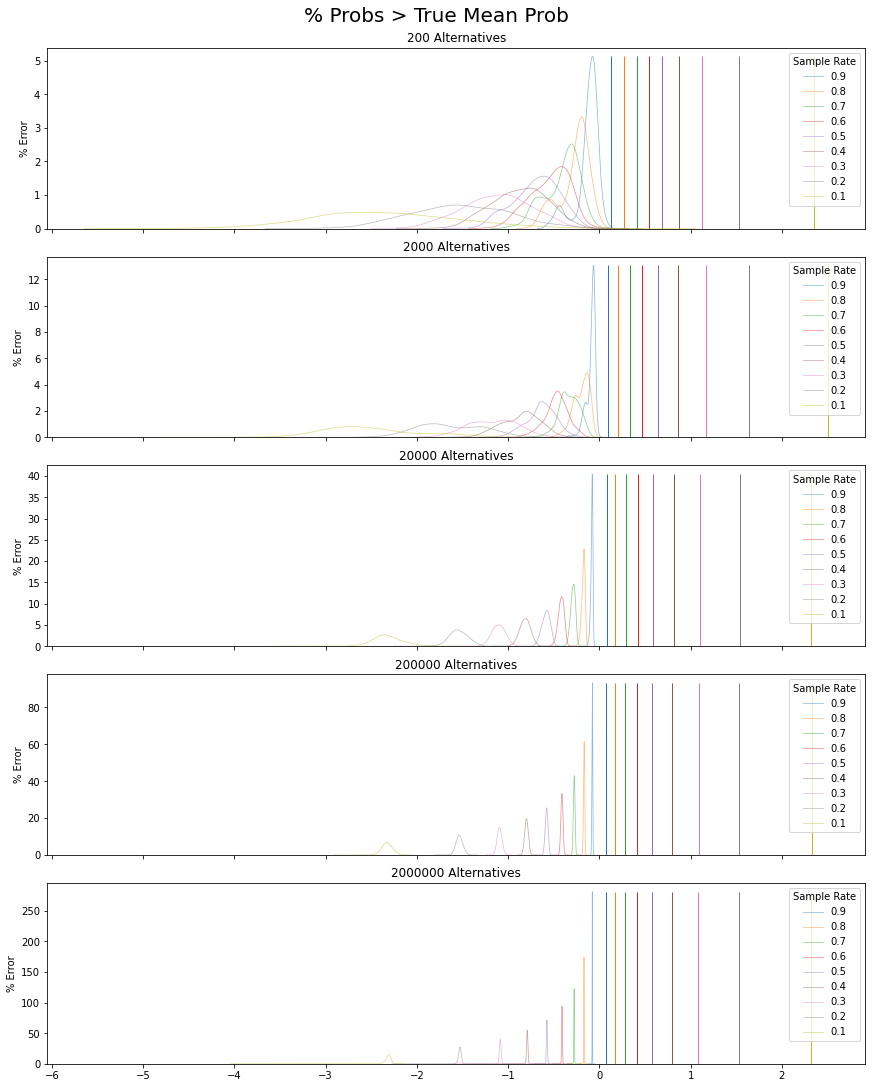

In [104]:
fig, axarr = plt.subplots(5, 1, figsize=(12,15), sharex=True, constrained_layout=True)
fig.suptitle("% Probs > True Mean Prob", fontsize=20)
for j, a in enumerate([200,2000,20000,200000,2000000]):
    for i in range(1,10)[::-1]:
        fname = '../data/chooser_metrics_{1}_alts_sr_{0}.npy'.format(i, a)
        with open(fname, 'rb') as f:
            metrics = np.load(f)
        metrics = metrics.reshape((15, int(a * 750/200))).T
        metric = metrics[:, 10]
        sns.kdeplot(metric, label=np.round(i * .1, 1), ax=axarr[j], alpha=0.5, lw=0.75)
        color = axarr[j].lines[-1].get_color()
        max_val = axarr[j].lines[0].get_ydata().max()
        axarr[j].vlines(np.mean(np.abs(metric)), 0, max_val, lw=1, edgecolor=color, alpha=1)
        axarr[j].legend(title='Sample Rate')
        axarr[j].set_title("{0} Alternatives".format(a))
        axarr[j].set_ylabel("% Error")